<a href="https://colab.research.google.com/github/kopmean/Teach-Basic-Ai/blob/main/lab_11_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [ ]:
NAME = "Sira Attawanich"
STUDENT_ID = "63070243"

---

# 1 Swiss Row Dataset

In [ ]:
import numpy as np
import sklearn.datasets
import sklearn.decomposition
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1.1 Generate a Swiss Row dataset by using make swiss roll function from sklearn library using n samples = 1000 and noise = 0.05.

What is Swiss Row dataset?

In [ ]:
dataset = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.05, random_state=0)
X, y = dataset

YOUR ANSWER HERE

### 1.2 Write a function to normalise the data to zero-mean:
$$
norm = normalise\_data(X)
$$

In [ ]:
def normalise_data(X):
    # YOUR CODE HERE
    return X-np.mean(X, axis=0)

In [ ]:
normalise_data(X)

array([[-10.82021005,   1.75071904,  -5.015339  ],
       [  3.16741545, -10.52673305, -10.81197151],
       [ -7.92863787,  -0.74600525,  -9.13543713],
       ...,
       [  5.48755706,  -0.62166135,  10.6784935 ],
       [  3.73774784,   2.69422494,   3.21909174],
       [ -0.84073134,  -0.16133467, -11.709484  ]])

### 1.3 Write a function to calculate a covariance matrix (Σ):
$$
Σ = CovarianceMatrix(X_{norm})
$$

In [ ]:
def covariance_matrix(X):
    # YOUR CODE HERE
    return np.dot(X.T, X)/(X.shape[0] - 1)

In [ ]:
covariance_matrix(normalise_data(X))

array([[41.84025208,  2.28844771,  4.43986498],
       [ 2.28844771, 39.47259363, -0.21511718],
       [ 4.43986498, -0.21511718, 49.6147834 ]])

### 1.4 Write a function $find\_eig$ to find eigenvalues and eigenvector of the covariance matrix by using $eig$ function. The function should return the eigenvectors that are ranked according to the magnitude of eigenvalues in decending order.

$$
[Eig_{vector}, Eig_{value}] = find\_eig(Σ)
$$

In [ ]:
def find_eig(A):
    eig_value, eig_vector = np.linalg.eig(A)
    sorted_eig_value, sorted_eig_vector = zip(*sorted(zip(eig_value,eig_vector)
                                                        , key=lambda x:x[0],reverse=True))
    return np.array(sorted_eig_vector), np.array(sorted_eig_value)

In [ ]:
find_eig(covariance_matrix(normalise_data(X)))

(array([[-0.42279934, -0.6298829 , -0.65152763],
        [-0.90400643,  0.24289592,  0.35181522],
        [-0.06334899,  0.73773241, -0.67211442]]),
 array([51.67621183, 41.80354854, 37.44786875]))

### 1.5 Plot the variance of all principal components obtained by $find\_eig$. Then plot the percentage cumulative variance graph for all principal components.

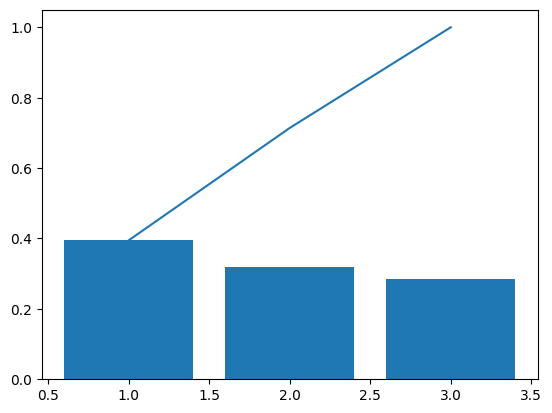

In [ ]:
normalised_X = normalise_data(X)
co_X = covariance_matrix(normalised_X)
eig_vectors, eig_values = find_eig(co_X)

cumulative_variances = []
variances = []
for i in range(3):
    cumulative_variance = np.sum(eig_values[:i+1]) / np.sum(eig_values)
    cumulative_variances.append(cumulative_variance)
    variance = eig_values[i] / np.sum(eig_values)
    variances.append(variance)

plt.plot([1, 2, 3], cumulative_variances)
plt.bar([1, 2, 3], variances)
plt.show()

### 1.6 Write a function $find\_eig\_svd$ to find eigenvalues and eigenvector of the covariance matrix by using svd function. The function should return the eigenvectors that are ranked according to the magnitude of eigenvalues in decending order.
$$
[Eig_{vector}, Eig_{value}] = find\_eig\_svd(Σ)
$$

In [ ]:
def find_eig_svd(A):
    # YOUR CODE HERE
    u, d, v = np.linalg.svd(A)
    eig_value, eig_vector = d, u
    sorted_eig_value, sorted_eig_vector = zip(*sorted(zip(eig_value,eig_vector)
                                                        , key=lambda x:x[0],reverse=True))
    return np.array(sorted_eig_vector), np.array(sorted_eig_value)

### 1.7 Plot the variance of all principal components obtained by $find\_eig\_svd$. Then plot the percentage cumulative variance graph for all principal components.

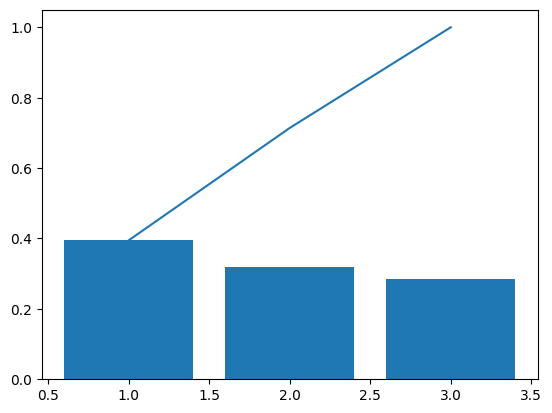

In [ ]:
normalised_X = normalise_data(X)
co_X = covariance_matrix(normalised_X)
eig_vectors, eig_values = find_eig_svd(co_X)

cumulative_variances = []
variances = []
for i in range(3):
    cumulative_variance = np.sum(eig_values[:i+1]) / np.sum(eig_values)
    cumulative_variances.append(cumulative_variance)
    variance = eig_values[i] / np.sum(eig_values)
    variances.append(variance)

plt.plot([1, 2, 3], cumulative_variances)
plt.bar([1, 2, 3], variances)
plt.show()

### 1.8 Project the data into 2D feature space by both methods. Illustrate the scatter plots of the new projected data matrix by both methods. Since the original number of features for this data is 3, plot all the combinations of all three features. Then discuss the results.

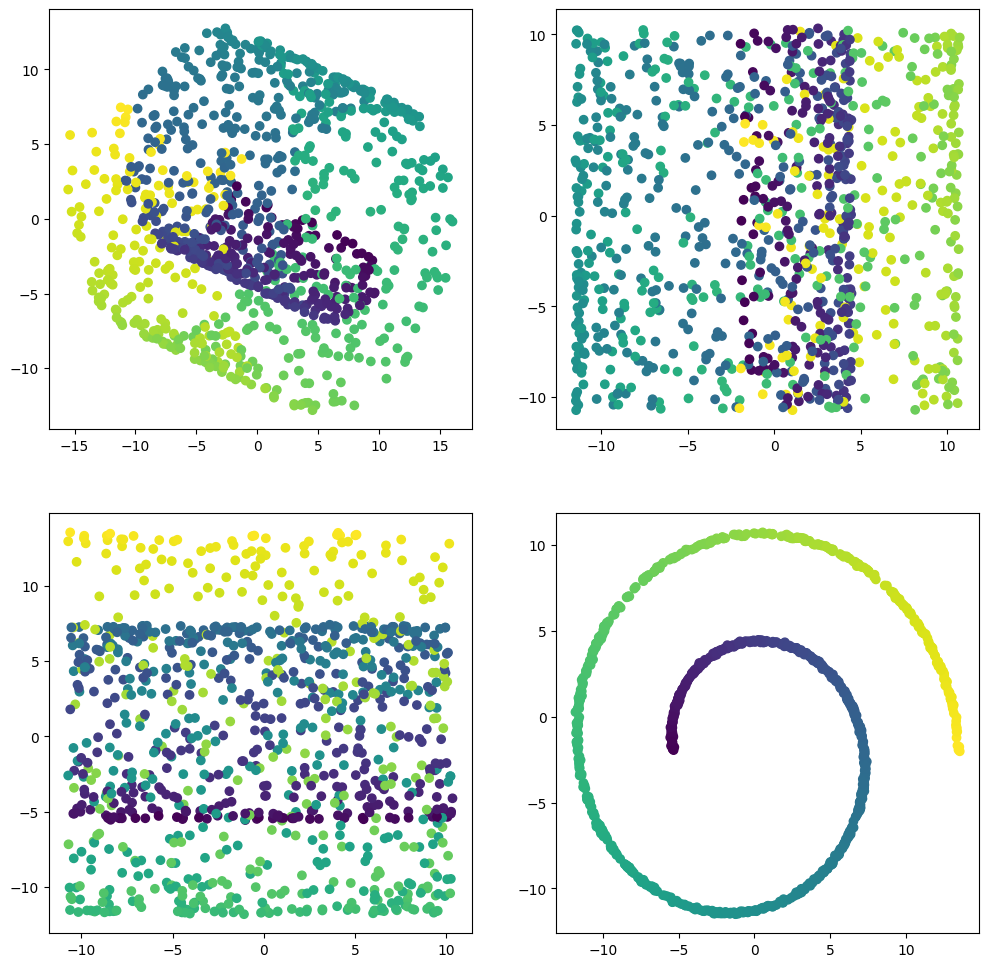

In [ ]:
def pca_project(X, k):
    normalised_X = normalise_data(X)
    co_X = covariance_matrix(normalised_X)
    eig_vectors, eig_values = find_eig(co_X)

    return np.dot(normalised_X, eig_vectors[:k].T)

fig, axs = plt.subplots(2, 2, figsize=(12,12))
pca_result = pca_project(X, k=2)
axs[0,0].scatter(pca_result[:, 0], pca_result[:,1], c=y)
axs[0,1].scatter(normalised_X[:, 0], normalised_X[:,1], c=y)
axs[1,0].scatter(normalised_X[:, 1], normalised_X[:,2], c=y)
axs[1,1].scatter(normalised_X[:, 2], normalised_X[:,0], c=y)

### 1.9 Compare the $Eig_{vector}$ and $Eig_{value}$ obtained by $find\_eig$ and $find\_eig\_svd$. Do they give the same solutions? Elaborate the reason behind this.

In [ ]:
eig = find_eig(co_X)
eig_svd = find_eig_svd(co_X)

In [ ]:
eig

(array([[-0.42279934, -0.6298829 , -0.65152763],
        [-0.90400643,  0.24289592,  0.35181522],
        [-0.06334899,  0.73773241, -0.67211442]]),
 array([51.67621183, 41.80354854, 37.44786875]))

In [ ]:
eig_svd

(array([[-0.42279934,  0.65152763,  0.6298829 ],
        [-0.06334899,  0.67211442, -0.73773241],
        [-0.90400643, -0.35181522, -0.24289592]]),
 array([51.67621183, 41.80354854, 37.44786875]))

วิธีการต่างกันแต่ผลลัพธ์เหมือนกัน

# 2 Iris Dataset

### 2.1 Import Iris dataset from sklearn library

In [ ]:
iris = sklearn.datasets.load_iris()

### 2.2 Define all features as $X$, Label—0 (Setosa), 1 (Versicolor) and 2 (Virginica) as y

In [ ]:
X = iris.data
print('X.shape:', X.shape)

y = iris.target
print('y.shape:', y.shape)

X.shape: (150, 4)
y.shape: (150,)


### 2.3 Use sklearn train_test_split function to randomly split the dataset to training and test sets with test size = 0.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

### 2.4 Apply PCA (SVD) on the training data and plot the cumulative variance of each component in this dataset.

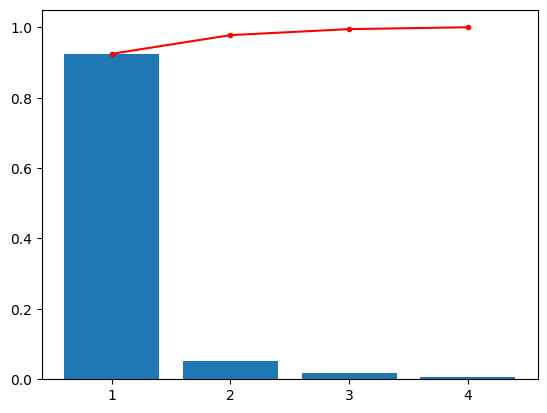

cumulative_variance: [0.9246187232017269, 0.9776852063187947, 0.9947878161267244, 1.0]


In [ ]:
# YOUR CODE HERE
def plot_variance(X):
    normalised_X = normalise_data(X)
    co_X = covariance_matrix(normalised_X)
    eig_vectors, eig_values = find_eig_svd(co_X)

    cumulative_variances = []
    variances = []
    n_components = range(len(eig_values))
    for i in n_components:
        cumulative_variance = np.sum(eig_values[:i+1]) / np.sum(eig_values)
        cumulative_variances.append(cumulative_variance)
        variance = eig_values[i]/np.sum(eig_values)
        variances.append(variance)

    plt.plot(np.array(n_components) + 1, cumulative_variances,'r.')
    plt.plot(np.array(n_components) + 1, cumulative_variances,'r')
    plt.bar(np.array(n_components) + 1, variances)
    plt.xticks(np.array(n_components) + 1)
    plt.show()
    print('cumulative_variance:', cumulative_variances)

plot_variance(X)

### 2.5 Select the number of principal component that gives more than 99 % of variance of the original training data.

In [ ]:
# YOUR CODE HERE
def pca_project(X, k):
    normalised_X = normalise_data(X)
    co_X = covariance_matrix(normalised_X)
    eig_vectors,eig_values = find_eig_svd(co_X)
    return np.dot(normalised_X, eig_vectors[:k].T)
n_components = ...

In [ ]:
n_components

Ellipsis

### 2.6 Project the training and test sets to the new feature space.

In [ ]:
# pca = pca_project(X_train, k=3)
projecte_X_train = pca_project(X_train,3)
projected_X_test = pca_project(X_test,3)

### 2.7 Illustrate the 2D scatter plots of all the combination of features for the original training data.

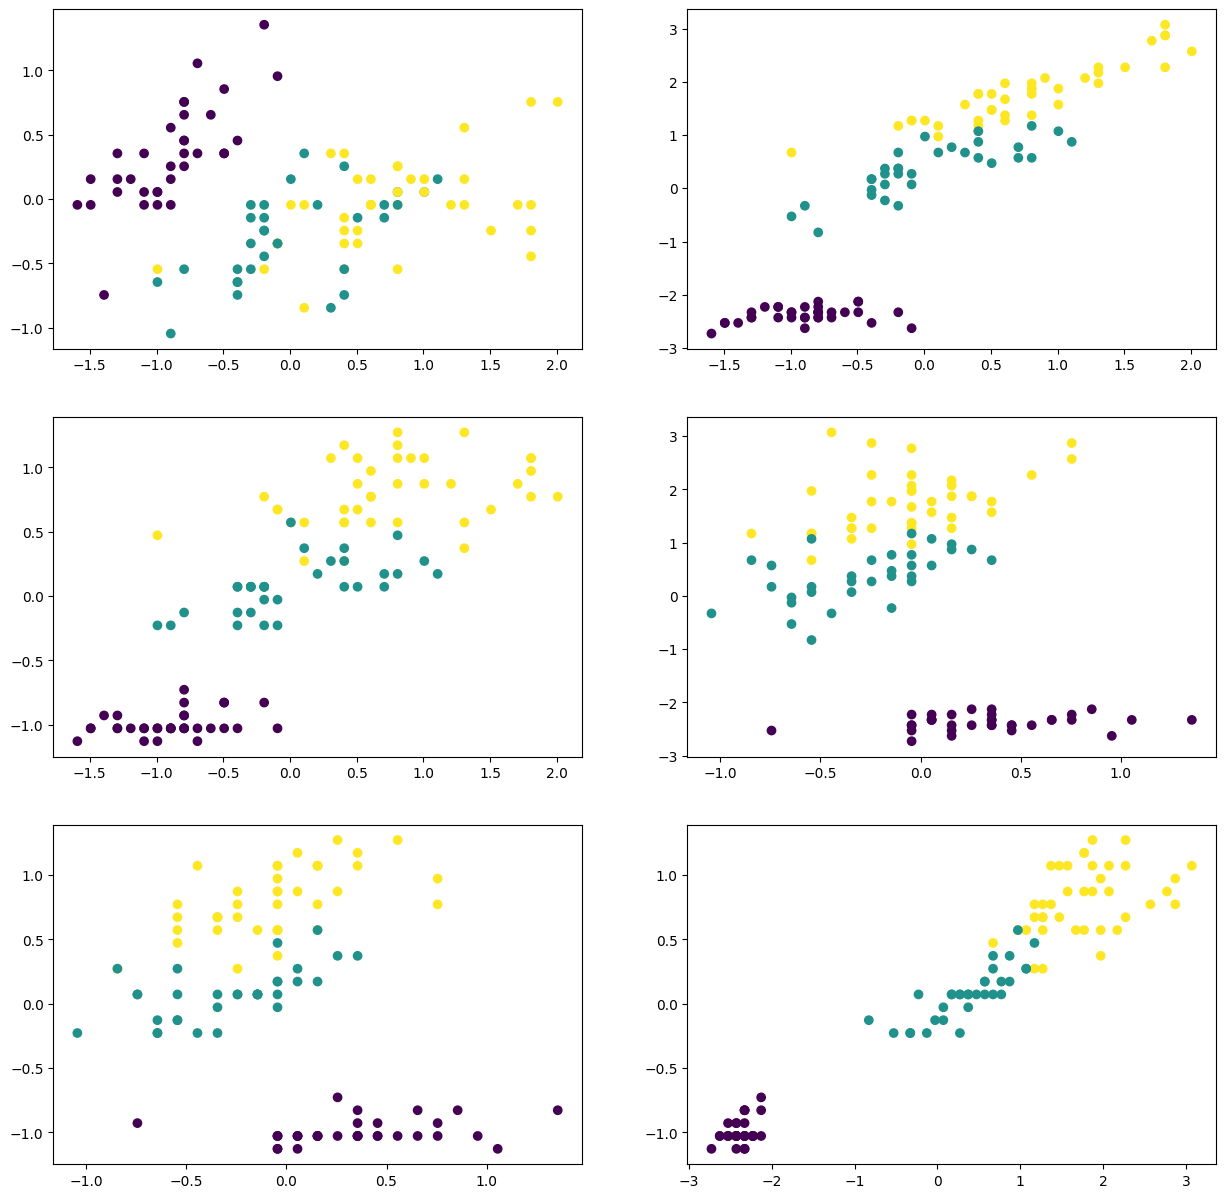

In [ ]:
# YOUR CODE HERE
normalised_data = normalise_data(X_train)
fig, axs = plt.subplots(3,2, figsize=(15,15))

axs[0,0].scatter(normalised_data[:, 0], normalised_data[:,1], c=y_train)
axs[0,1].scatter(normalised_data[:, 0], normalised_data[:,2], c=y_train)
axs[1,0].scatter(normalised_data[:, 0], normalised_data[:,3], c=y_train)
axs[1,1].scatter(normalised_data[:, 1], normalised_data[:,2], c=y_train)
axs[2,0].scatter(normalised_data[:, 1], normalised_data[:,3], c=y_train)
axs[2,1].scatter(normalised_data[:, 2], normalised_data[:,3], c=y_train)

plt.show()

### 2.8 Illustrate the 2D scatter plots of all the combination of features for the projected training data.

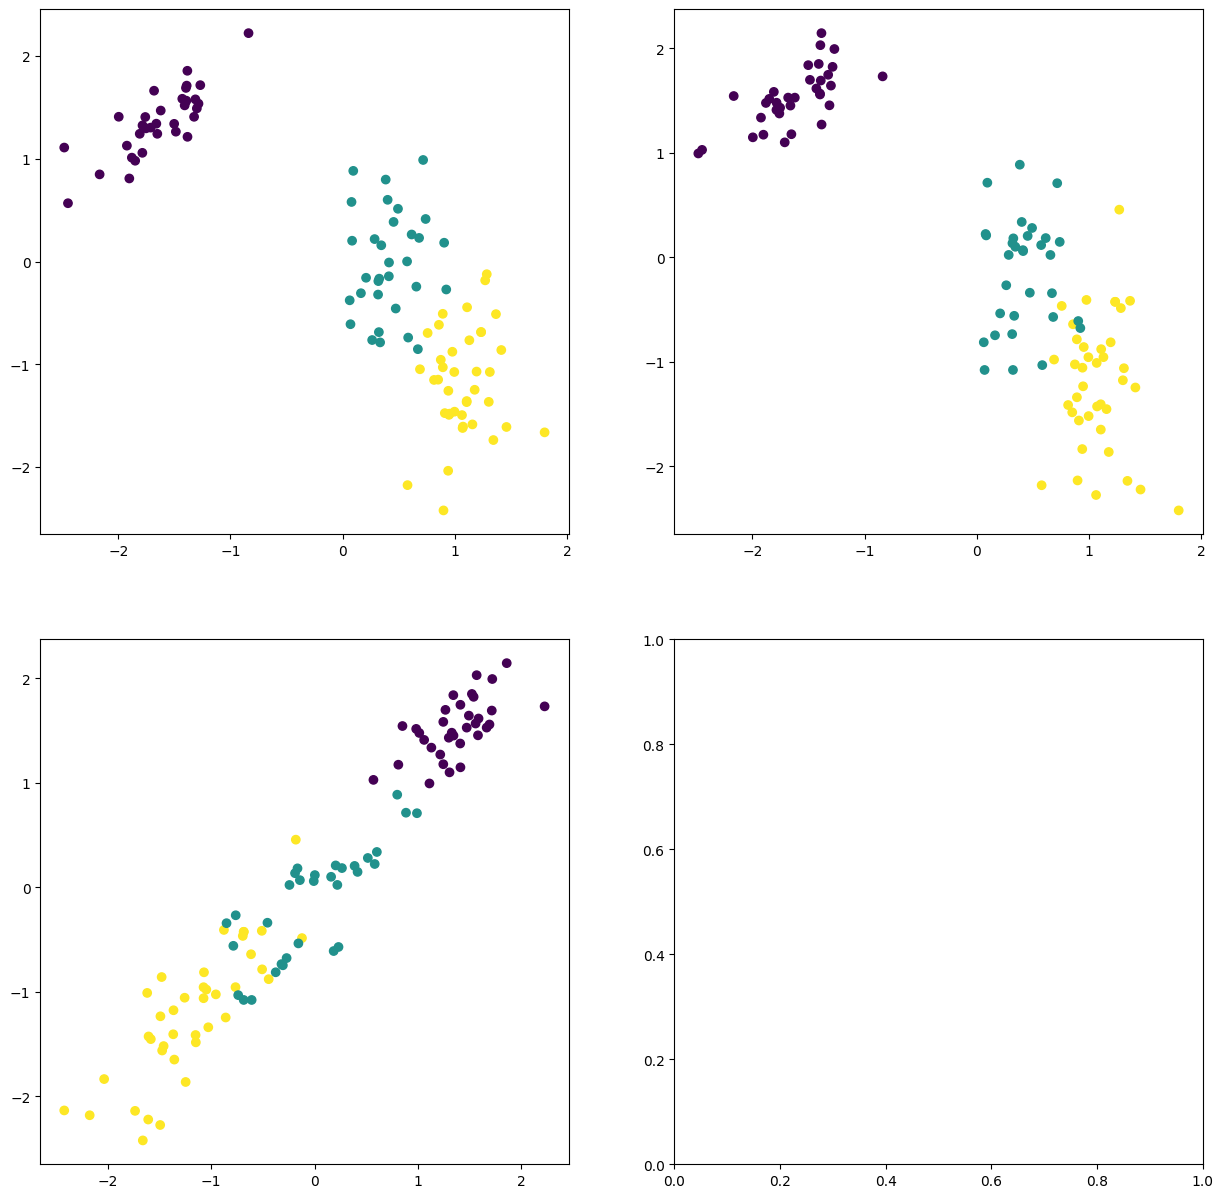

In [ ]:
# YOUR CODE HERE
fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].scatter(projecte_X_train[:,0], projecte_X_train[:,1], c=y_train)
axs[0,1].scatter(projecte_X_train[:,0], projecte_X_train[:,2], c=y_train)
axs[1,0].scatter(projecte_X_train[:,1], projecte_X_train[:,2], c=y_train)

### 2.9 Discuss on what you observed from both sets of scatter plots.

เห็นการแบ่งกลุ่มที่ชัดเจณขึ้น

### 2.10 Create a logistic regression classifier for each of the original and the new feature sets. Then compare the accuracy of the models. What do you observe?

In [ ]:
def accuracy(predicted_y, actual_y):
    return np.mean(predicted_y == actual_y)

model1 = LogisticRegression(max_iter=100).fit(projecte_X_train, y_train)
print(accuracy(model1.predict(projected_X_test), y_test))
print(projecte_X_train.shape)

model2 = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print(accuracy(model2.predict(X_test), y_test))
print(X_train.shape)

0.9777777777777777
(105, 3)
0.9777777777777777
(105, 4)


การทำ PCA หากลด max_iter ลงก็ยังช่วยทำให้ accuracy เท่าเดิมได้อยู่ดีและ Dimension ก็ลดลง